__This is a data exploratory analysis using python and SQL on MCDonalad's menu nutrition fact. The dataset is downloaded from Kaggle and uploaded in to IBM DB2 cloud__
This example is a part of "Databases and SQL for Data Science" course offered by Coursera.org 
The skeleton of the solution is partly provided in the course.  

In [87]:
# loading ipython sql extension
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [88]:
# insert the location of your connection string as below
%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

In [89]:
df_sql = %sql select * from mcMenu;

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


In [90]:
df = df_sql.DataFrame()
df.head()

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat____daily_value_,saturated_fat,saturated_fat____daily_value_,trans_fat,...,carbohydrates,carbohydrates____daily_value_,dietary_fiber,dietary_fiber____daily_value_,sugars,protein,vitamin_a____daily_value_,vitamin_c____daily_value_,calcium____daily_value_,iron____daily_value_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [91]:
# let's view the summary of the statistics of the data in df
import pandas as pd
df.describe(include='all')
# accordingly there are 260 rown in the df with 9 unique categories

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat____daily_value_,saturated_fat,saturated_fat____daily_value_,trans_fat,...,carbohydrates,carbohydrates____daily_value_,dietary_fiber,dietary_fiber____daily_value_,sugars,protein,vitamin_a____daily_value_,vitamin_c____daily_value_,calcium____daily_value_,iron____daily_value_
count,260,260,260,260.000000,260.000000,260,260.000000,260,260.000000,260,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,52,NaN,26,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Filet-O-Fish,16 fl oz cup,NaN,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,49,NaN,60,NaN,204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,NaN,21.815385,NaN,29.965385,NaN,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,NaN,21.885199,NaN,26.639209,NaN,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,NaN,3.750000,NaN,4.750000,NaN,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,NaN,17.000000,NaN,24.000000,NaN,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,NaN,35.000000,NaN,48.000000,NaN,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


__Finding the item with highest content of sodium__

C:\Users\farha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\farha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


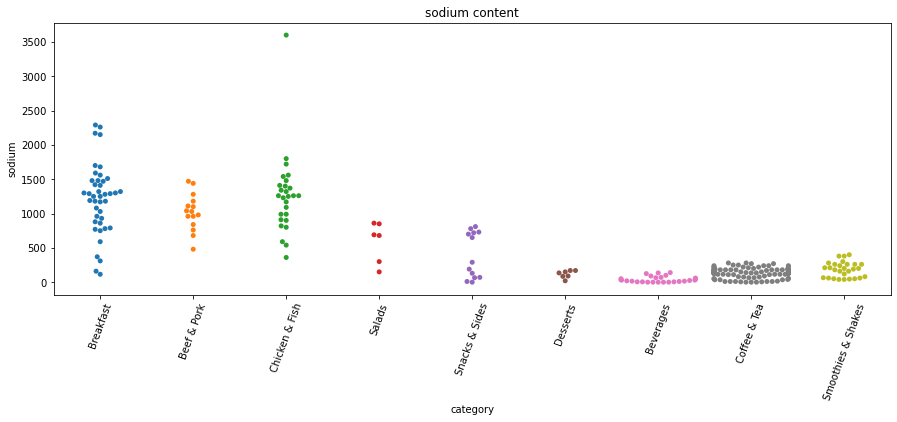

In [94]:
fig, ax=plt.subplots(figsize=(15,5))
# sns.barplot(x="category",y="sodium",ax=ax,data=df)
plot = sns.swarmplot(x='category',y='sodium',ax=ax,data=df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title('sodium content')
plt.show()
# the plot below shows that chiecken and fish has the highest content of sodium in the mcDonald's menu

In [95]:
df_sql_sodium = %sql select item, sodium from mcMenu where category='Chicken & Fish'
df_sodium = df_sql_sodium.DataFrame()

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


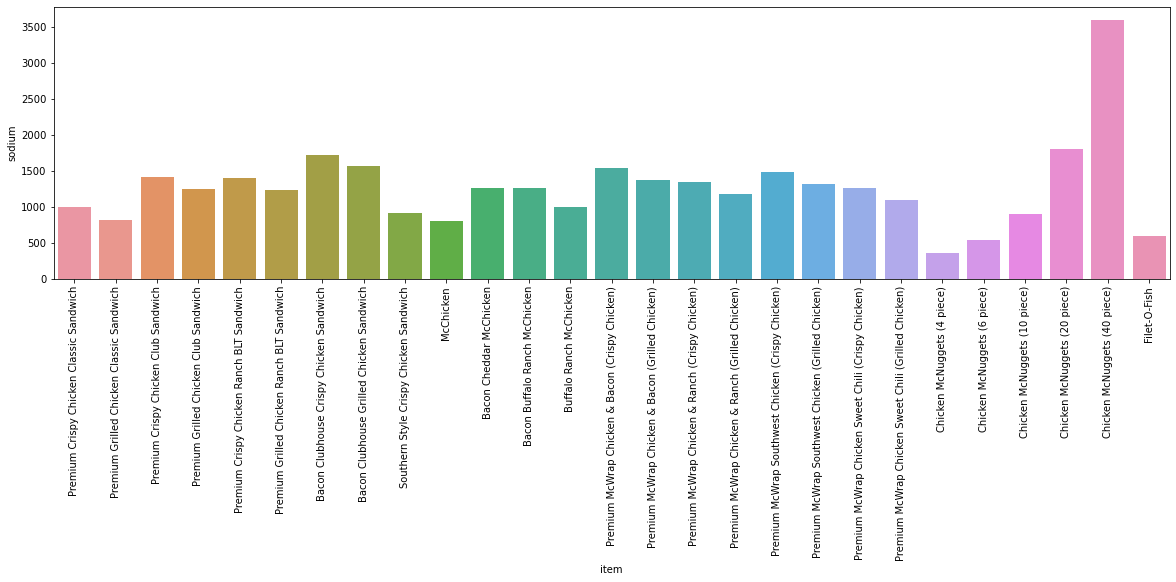

In [96]:
fig, ax = plt.subplots(figsize=(20,5))
plot = sns.barplot(x="item",y="sodium",data=df_sodium,ax=ax)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()
# the plot below shows that the chichen MCNuggets (40 pieces) in the category of Chickehn & Fish has the highest content of sodium

In [102]:
# an alternative approach to find the item with the highest content of sodium is using SQL as presented below
df_sql_na = %sql select item, sodium from mcMenu where sodium in (select max(sodium) from mcMenu)
df_sql_na

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


item,sodium
Chicken McNuggets (40 piece),3600


In [113]:
# another approach to find the item with highest content of sodium using python
item_max_sodium = df[df['sodium']==max(df['sodium'])][['item','sodium']]
item_max_sodium

,item,sodium
82,Chicken McNuggets (40 piece),3600


In [117]:
# or maybe using the approach presented below
df.at[df['sodium'].idxmax(),'item']

'Chicken McNuggets (40 piece)'

__is there any correlation between total fat and protein content?__

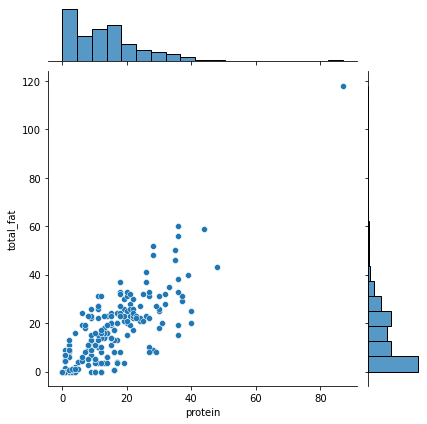

In [129]:
%matplotlib inline
plot = seaborn.jointplot(x="protein", y="total_fat", data=df)
# there is a point on the top right side of the plot which is a possible outlier
# there seems to be some sort of correlation between total fat and protein

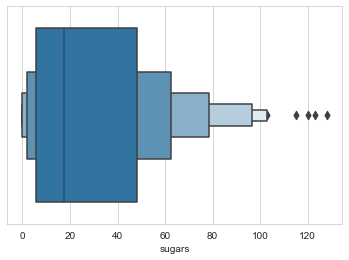

In [146]:
%matplotlib inline
plot = sns.set_style("whitegrid")
ax = sns.boxenplot(x=df["sugars"])
# the plot shows a few outliers with extreme values of sugar. These items are retreive in the following cell.

In [149]:
item_w_high_sugar_content = df[df['sugars'] > 110][['item','sugars']]
item_w_high_sugar_content
# the below tables shows that the items with extremly high sugar contents are shakes and candy

,item,sugars
246,Strawberry Shake (Large),123
249,Chocolate Shake (Large),120
251,Shamrock Shake (Large),115
253,McFlurry with M&M’s Candies (Medium),128
